In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
d_fGS = [16, 17, 18, 19, 20, 21, 22]

data_path = []
data_path.append('data\\17.txt')
data_path.append('data\\18.txt')
data_path.append('data\\19.txt')
data_path.append('data\\20.txt')
data_path.append('data\\21.txt')
data_path.append('data\\22.txt')

numberPlots = 6

# data_label = []
# for i in range(numberPlots):
#     data_label.append('$FF_{{final}}$ = {}'.format(finalFF[i]))

In [4]:
data = []
T_tick_positions = []
for i in range(numberPlots):
    data_current = pd.read_csv(data_path[i], sep=" ", header=None, skiprows= 29)
    data.append(-1* data_current.iloc[:, 1:])
    all_values = []
    for j in range(1, 12):
        all_values.extend(data[i][j].to_numpy())
    Tmin = min(all_values)
    Tmax = max(all_values)
    T_tick_positions.append(np.linspace(Tmin, Tmax, 8))

x_ticks = pd.read_csv(data_path[0], sep=" ", header=None, skiprows= 3, nrows= 11)
x_ticks = x_ticks.iloc[:, 1:]
x_ticks = x_ticks.to_numpy()[:,0]*1000000
x_ticks = [int(x) for x in x_ticks]
y_ticks = pd.read_csv(data_path[0], sep=" ", header=None, skiprows= 16, nrows= 11)
y_ticks = y_ticks.iloc[:, 1:]
y_ticks = y_ticks.to_numpy()[:,0]

ymax = max(y_ticks)
ymin = min(y_ticks)
c = (ymax - ymin)/22
y_tick_positions = np.linspace(ymin + c, ymax -c, 11)
xmax = max(x_ticks)
xmin = min(x_ticks)
cx = (xmax - xmin)/22
x_tick_positions = np.linspace(xmin + cx, xmax -cx, 11)

print(x_ticks)

[90, 110, 130, 150, 170, 190, 210, 230, 250, 270, 290]


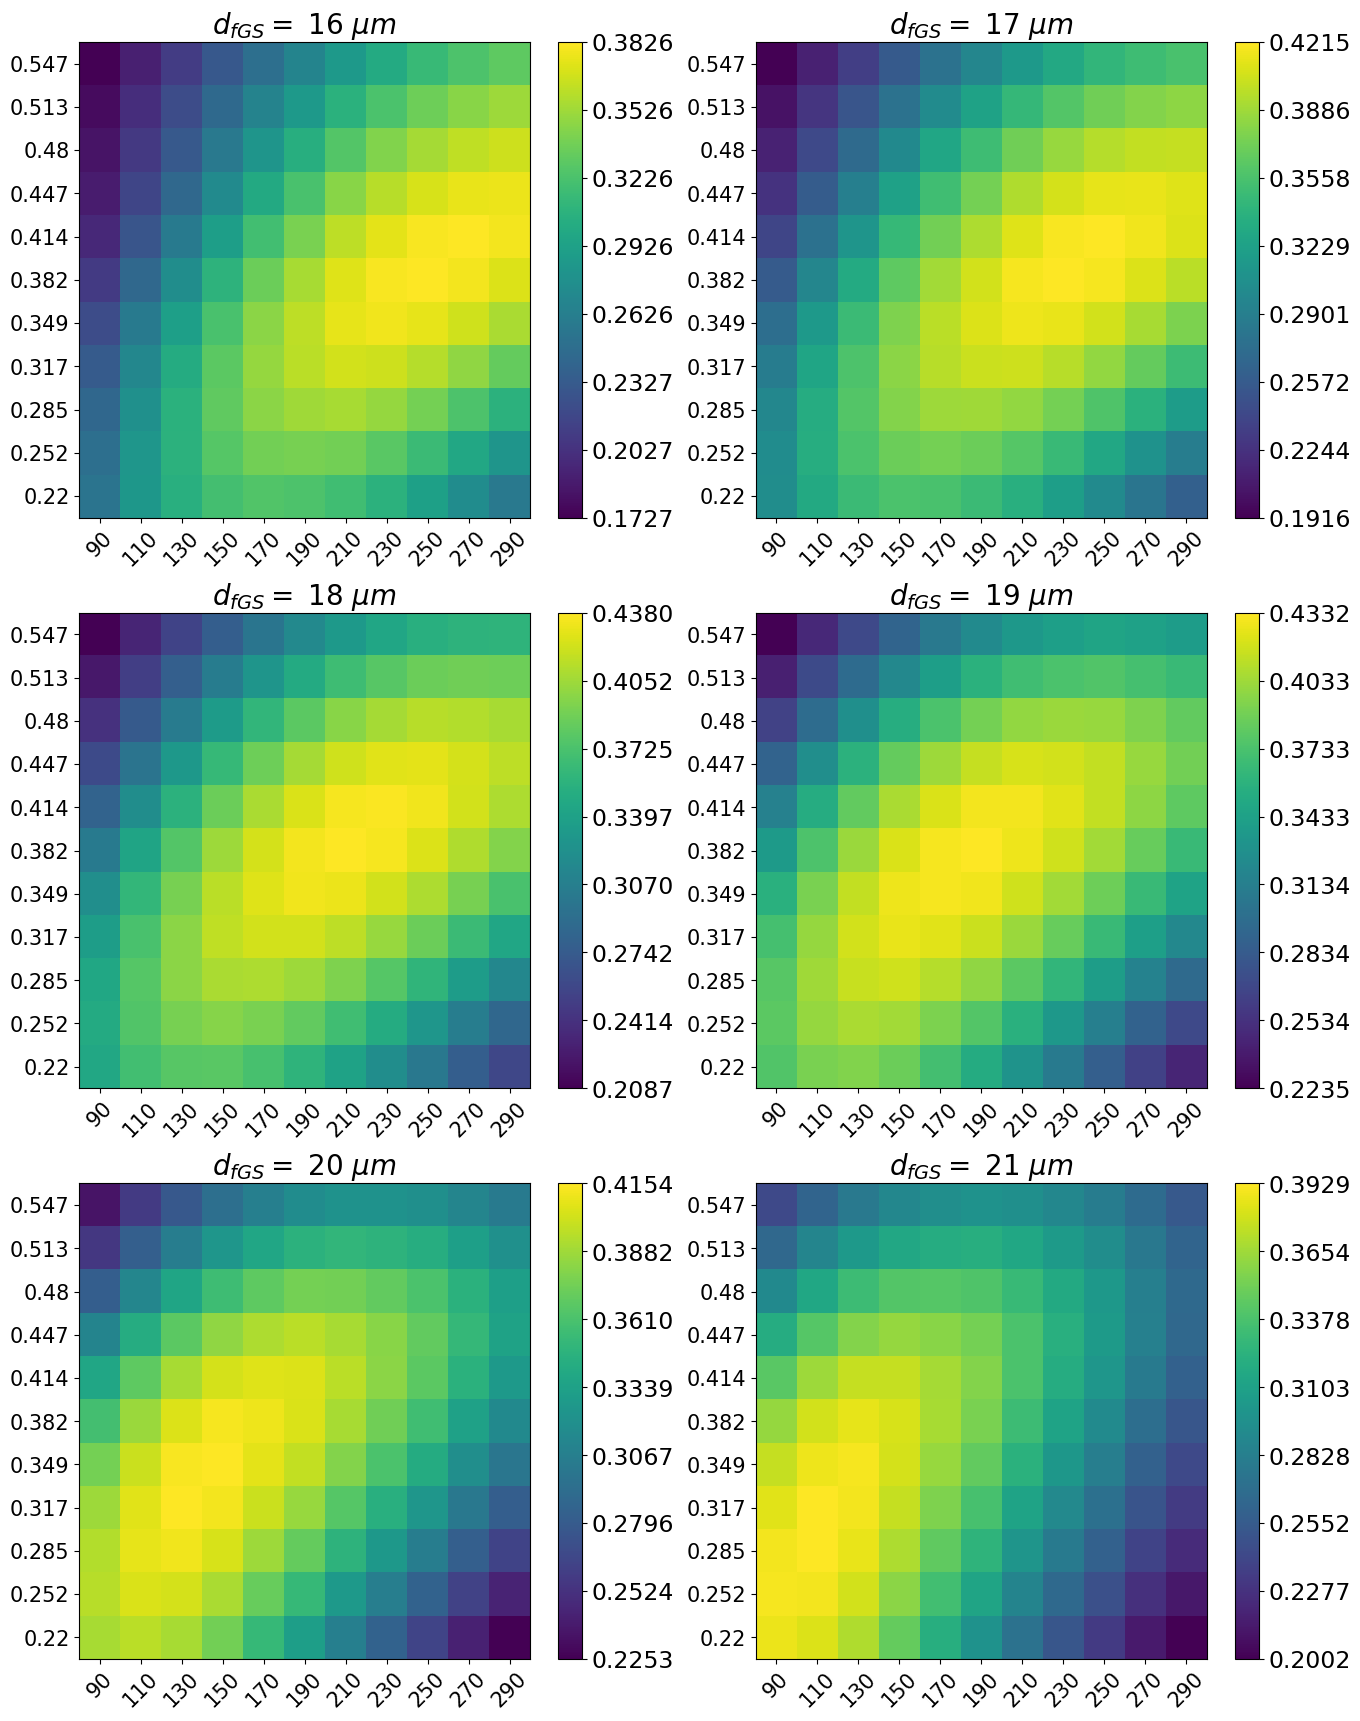

In [13]:
# 3 times 2 

# Assuming 'data' is a list of 2D arrays, 'x_ticks', 'y_ticks', 'x_tick_positions', 'y_tick_positions', 'd_fGS', and 'T_tick_positions' are defined
numberPlots = 6  # or the length of your 'data' list if it's not 6
labelsize = 15

# Define the extent outside the loop
extent = [min(x_ticks), max(x_ticks), min(y_ticks), max(y_ticks)]

# Create a figure with a 3x2 grid of axes
fig, axs = plt.subplots(3, 2, figsize=(16, 21))  # Adjust the figsize to fit your needs

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through your data and plot each dataset on one of the subplots
for i in range(numberPlots):
    # Select the current axis
    ax = axs[i]
    
    # Create the imshow plot for the current dataset
    im = ax.imshow(data[i], extent=extent, aspect='auto')
    
    # Set the ticks and labels
    ax.set_xticks(x_tick_positions)
    ax.set_yticks(y_tick_positions)
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set_yticklabels(y_ticks)
    ax.tick_params(axis = 'both', labelsize = labelsize)

    # Optionally set labels and title
    # ax.set_ylabel('$FF_{{final}}$')
    # ax.set_xlabel('distance from waist')
    ax.set_title('$d_{{fGS}}=$ {} $\\mu m$'.format(d_fGS[i]), fontsize = 20)

    # Add a colorbar to each subplot
    heatmap = fig.colorbar(im, ax=ax, ticks=T_tick_positions[i])
    heatmap.ax.tick_params(labelsize=labelsize+2)
# Adjust layout to prevent overlap
# plt.tight_layout()

# Show the combined plot
plt.show()
fig.savefig('heatmap_6plots.png', dpi=300)

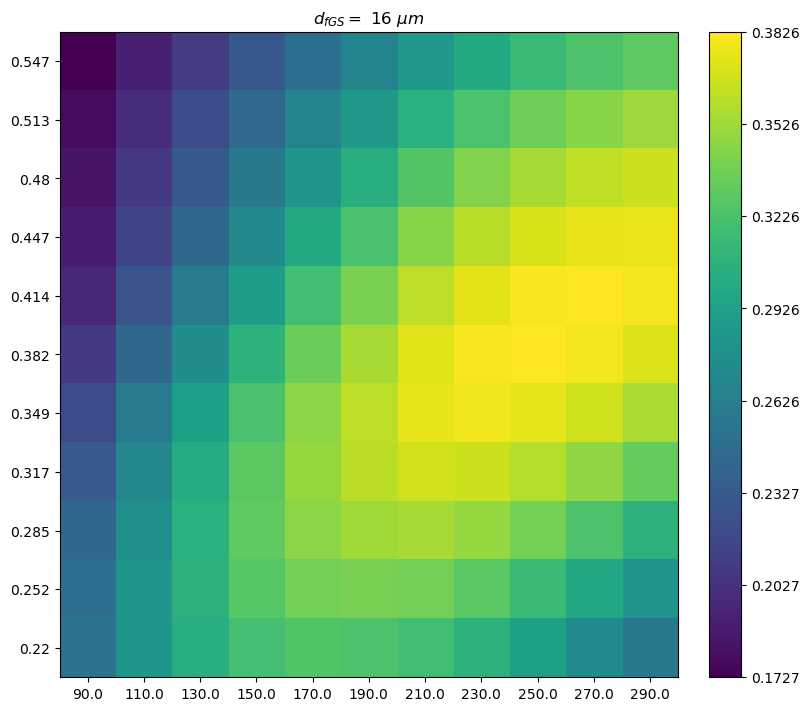

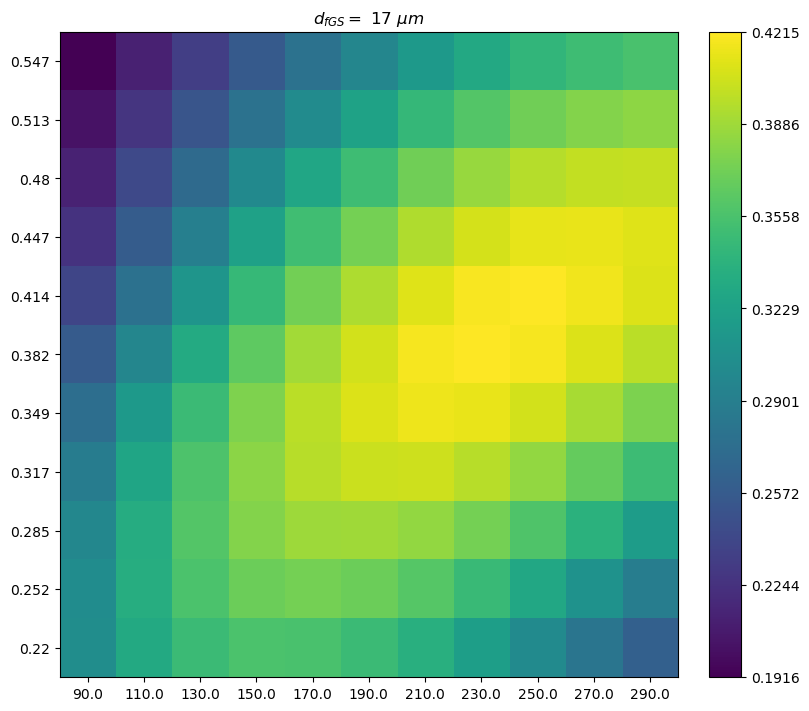

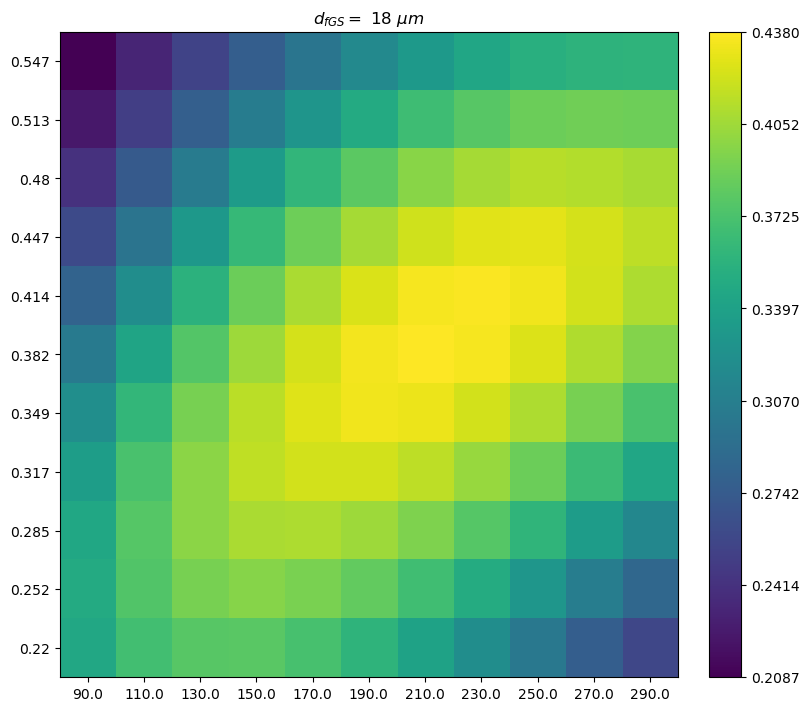

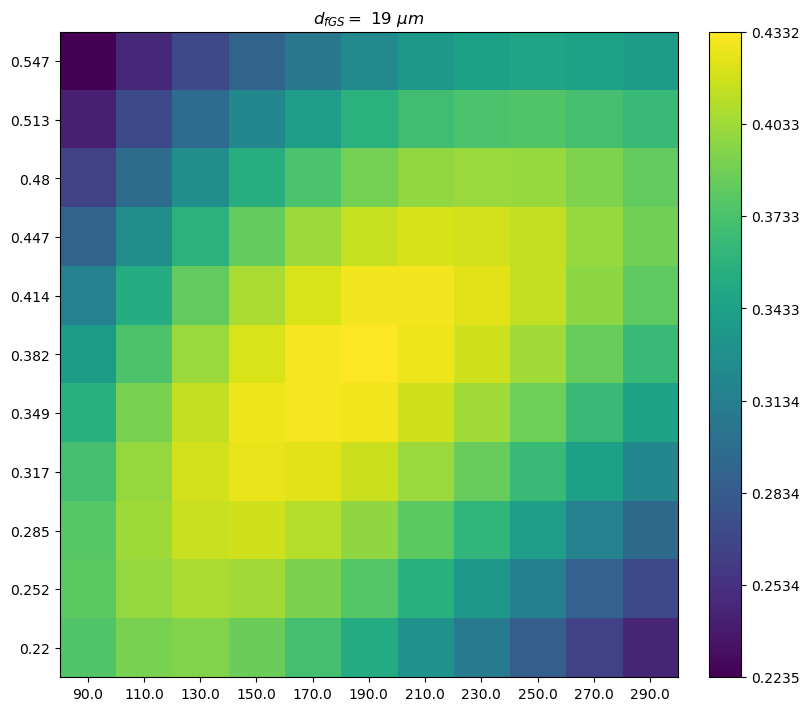

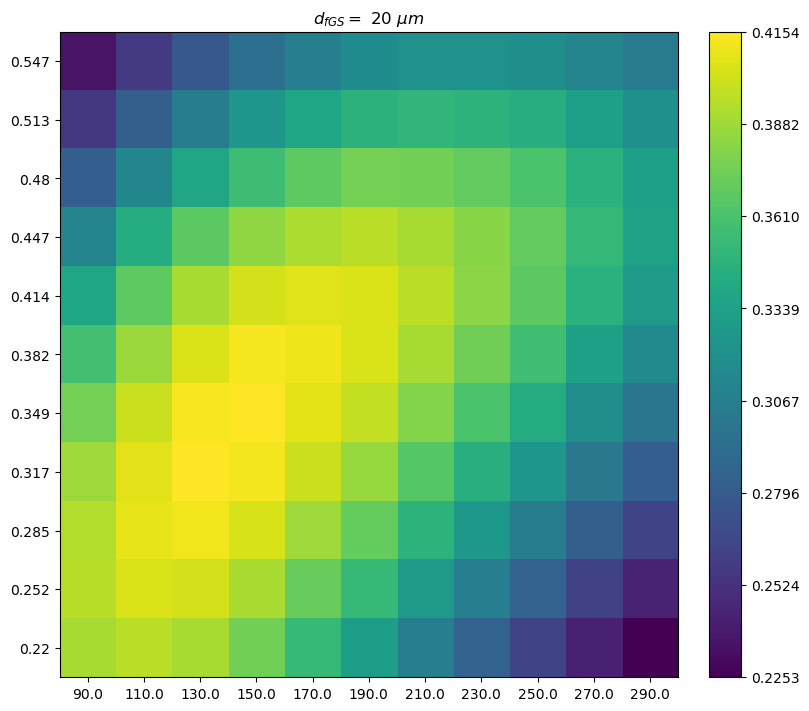

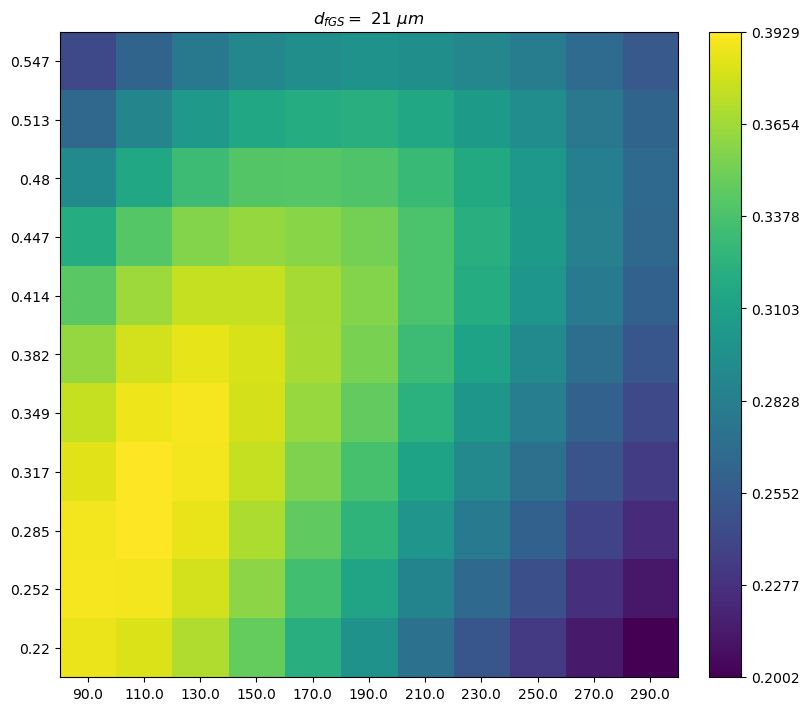

In [ ]:
extent = [min(x_ticks), max(x_ticks), min(y_ticks), max(y_ticks)]

for i in range(numberPlots):
    fig, ax = plt.subplots(figsize=(8, 7), layout='constrained')
    im = ax.imshow(data[i], extent=extent, aspect='auto') 

    ax.set_xticks(x_tick_positions)
    ax.set_yticks(y_tick_positions)
    # ax.set_ylabel('$FF_{{final}}$')
    # ax.set_xlabel('distance from waist')
    ax.set_title('$d_{{fGS}}=$ {} $\\mu m$'.format(d_fGS[i]))

    ax.set_xticklabels(x_ticks)
    ax.set_yticklabels(y_ticks)

    fig.colorbar(im, ax=ax, ticks = T_tick_positions[i])
    plt.show()